In [35]:
import numpy as np
from scipy.linalg import eigh 
from floquet_simulations.hamiltonians import SolveSchrodingerTimeIndependent, H0 #(hamiltonian, tspan, nTimesteps, psi0):
N = 100
ham = H0(N)
psi0 = np.zeros(N, dtype=np.complex_); 
n_atom = 6
for i in range(50 - n_atom, 50+n_atom+1):
    psi0[i] = 1

sol = SolveSchrodingerTimeIndependent(ham, (0,50), 200, psi0)
psi = np.abs(sol)**2
max = np.max(psi)



/tmp/ipykernel_5877/1686981101.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap= mpl.cm.get_cmap(cmapcol)


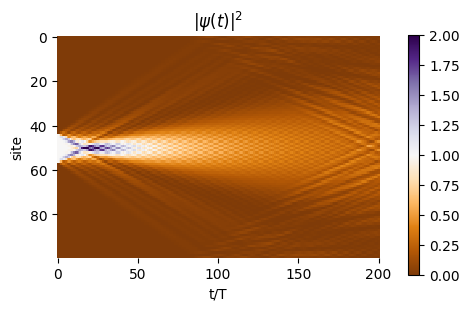

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt


normaliser = mpl.colors.Normalize(vmin=0, vmax=2)

label = r'$|\psi(t)|^2$'

cmapcol = 'PuOr' #PiYG_r
cmap= mpl.cm.get_cmap(cmapcol)

sz = 3
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, constrained_layout=True, 
                        figsize=(sz*1.3,sz))


ax.matshow(psi, interpolation='none', cmap=cmap, norm=normaliser, aspect='auto')
ax.set_title(label)
ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, 
    labeltop=False)  
# ax[i].set_xticks(x_positions)
ax.set_xlabel('t/T')
# ax.set_xticklabels(x_labels)
for side in ["bottom", "top", "left", "right"]:
    ax.spines[side].set_visible(False)
ax.set_ylabel('site')

cax = plt.axes([1.03, 0.1, 0.03, 0.8])
fig.colorbar(plt.cm.ScalarMappable(cmap=cmapcol, norm=normaliser), cax=cax)
# fig.suptitle(title, y = 1.3,  fontfamily='STIXGeneral')

plt.show()


In [27]:
f = lambda x: np.abs(x)**2
print(f(sol)[51,0])
print((np.abs(sol)**2)[51,0])

0.999999999999988
0.999999999999988


In [30]:
list(range(49, 51))

[49, 50]

In [39]:
import numpy as np
from scipy.linalg import eigh 
ham = np.diag(-np.ones(N-1),-1)+np.diag(-np.ones(N-1),1)
evals, evecs = eigh(ham)
coeffs =  np.dot(np.conj(evecs.T), psi0)
t_eval = np.linspace(0, 50, 100+1, endpoint=True)
sol = [np.dot(evecs, coeffs*np.exp(-1j*evals*t)) for t in t_eval]
sol = np.vstack(sol).T

In [38]:
coeffs

array([ 1.81676936e+00+0.j, -5.53637816e-02+0.j, -1.71798231e+00+0.j,
        1.01797722e-01+0.j,  1.53022017e+00+0.j,  1.31812308e-01+0.j,
       -1.27193119e+00+0.j, -1.40566370e-01+0.j,  9.68003581e-01+0.j,
       -1.26647931e-01+0.j,  6.46837292e-01+0.j,  9.23019507e-02+0.j,
       -3.37065262e-01+0.j, -4.30682266e-02+0.j, -6.43461827e-02+0.j,
        1.31121408e-02+0.j,  1.51367401e-01+0.j, -6.71775995e-02+0.j,
       -2.97754201e-01+0.j, -1.10407720e-01+0.j,  3.71027264e-01+0.j,
        1.35829746e-01+0.j,  3.75742336e-01+0.j,  1.39343259e-01+0.j,
        3.23587286e-01+0.j,  1.20381552e-01+0.j, -2.31361528e-01+0.j,
       -8.20030324e-02+0.j,  1.18454077e-01+0.j, -3.03979218e-02+0.j,
       -4.18188087e-03+0.j,  2.61101888e-02+0.j, -9.46494141e-02+0.j,
        7.84068847e-02+0.j, -1.65650335e-01+0.j, -1.18057027e-01+0.j,
       -2.01997895e-01+0.j, -1.38665288e-01+0.j,  2.02729512e-01+0.j,
        1.36907681e-01+0.j,  1.72205369e-01+0.j, -1.13067697e-01+0.j,
       -1.18880241e-